# Numerical Computing :: Project Twelve
### Julia Troni

Read this website about the The SIR Model of Spread of Disease – The Differential Equation Model:
https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model

- Implement and compare Euler’s method and RK2 for the SIR system.
- Find a step size h such that a plot of your trajectories matches the website’s figure. What value did you get for h for each method, and how did you get them

** Note I used $dt$ instead of $h$ in my code, since it made more sense to my brain

In [1]:
%matplotlib notebook
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import math
plt.style.use('seaborn-poster')
%matplotlib inline

## Euler's Method

Rule of thumb: global error is one order less than 1 step error and the 1 step error is $O(h^2)$ so global error is $O(h)$

In [2]:
#infection rate --> b= 1/2
#recovery rate --> k =1/3
#dt is same as h
#(b)Euler (b)Euler can you plot a SIR. Yes SIR! LOL I crack myself up:)
def EulersSIR(ndays=140, dt=0.01, b=1/2, k=1/3):
    npts=int(ndays/dt)
    t=np.arange(npts)*dt
    
    S= np.zeros(npts)
    I= np.zeros(npts)
    R= np.zeros(npts)
    
    I[0]=1.27e-6
    S[0]=1.0-I[0]
    R[0]=0.0
    
    for i in range(0, npts-1):
        S[i + 1] = S[i] -b*(S[i]*I[i])*dt
        I[i+1] = I[i] + (b*S[i]*I[i]-k*I[i])*dt
        R[i+1]=R[i]+(k*I[i])*dt
    
    plt.figure(figsize = (12, 8))
    plt.plot(t, S, 'b--', label='Susceptible')
    plt.plot(t, I, 'g--', label='Infective')
    plt.plot(t, R, 'r--', label='Removed')
    plt.title('SIR')
    plt.xlabel('Days (t)')
    plt.ylabel('f(t)')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

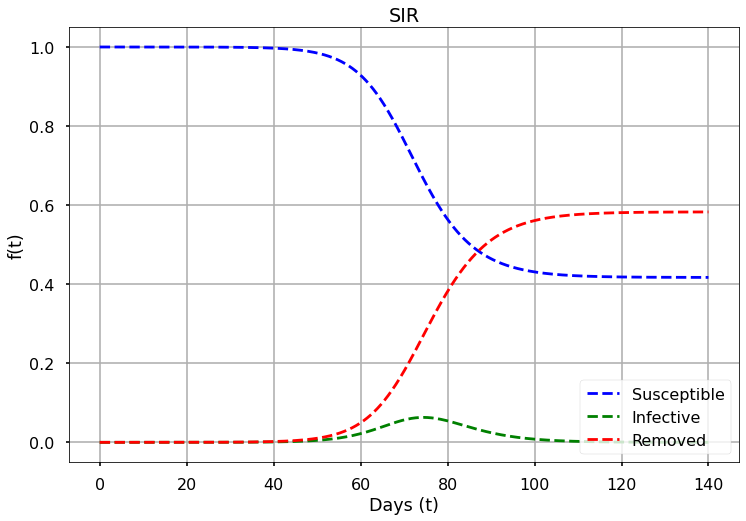

In [3]:
EulersSIR()

## Runge-Kutta (RK2)

Second Order Runge-Kutta so the global error is $O(h^2)$

In [4]:
ndays=140
b=1/2
k=1/3
v=0
I_0=1.27e-6
S_0=1.0-I_0
R_0=0.0
U_0= [S_0, I_0 ,R_0]

def f(t, u):
    S, I, R = u
    # ds/dt = -b * s(t) * i(t)
    # di/dt = b * s(t) * i(t) - k * i(t)
    # dr/dt = k * i(t)
    return np.array([-b*S*I, b*S*I - k*I, k*I])

def rungeKutta2(f=f, U_0=U_0, dt=0.01, ndays=140):  
    npts=int(ndays/dt)
     
    u = np.zeros((npts+1, len(U_0)))
    
    t = np.linspace(0,npts*dt, len(u))
    
    u[0] = U_0
      
    for i in range(0,npts):
        Y_star = u[i] + (dt/2)*f(t[i], u[i])
        u[i+1] = u[i] + dt*f((t[i] + (dt/2)), Y_star)
        
    
    S = u[:,0]
    I = u[:,1]
    R = u[:,2]
    
    plt.figure(figsize = (12, 8))
    plt.plot(t, S, 'b--', label='Susceptible')
    plt.plot(t, I, 'g--', label='Infective')
    plt.plot(t, R, 'r--', label='Removed')
    plt.title('SIR')
    plt.xlabel('Days (t)')
    plt.ylabel('f(t)')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()
    
    return 

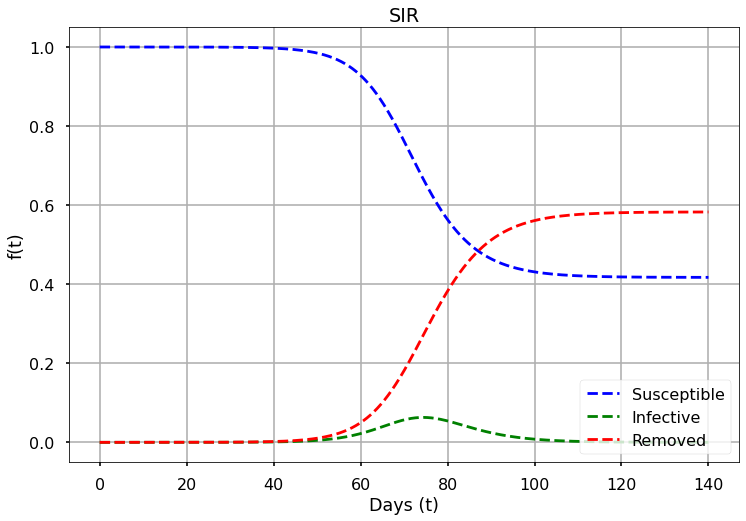

In [5]:
rungeKutta2(f, U_0, dt=0.01, ndays=140)


---
## Choose a stepsize. How?

Uh well this is kind of awkward because my figures look nearly identical to the figure on the website, but I just guessed, and it happened to be my first guess. So basically I did no fancy math, I just used my original guess for step size of dt=0.01 

Although I am guessing this is wrong becasue theres like 1/infinity chance of my first initial guess being correct. And also if you take into account floating point error then my brain starts to break.
Lol anyhow this seems like it was not the point of the project, but my plan was simply to run a loop of step sizes (lol so still guess and check) and/or ask Dr. Google

According to Dr. Google, you can get REALLY fancy (i.e. https://www.sciencedirect.com/science/article/pii/S0377042715002095) 

### Well that's a wrap folkz. Thanks Paul. 



----

## References


- I swear this book is way better than Sauer and very simlarly follows this class content (it even has a "Problem Statement" for each topic:)) I you haven't already checked it out, you certainly should! I have used it on top of your lectures for this whole semester and it has been so helpful!! 100% recommend it for other Num Comp folkzzzz https://pythonnumericalmethods.berkeley.edu/notebooks/chapter22.01-ODE-Initial-Value-Problem-Statement.html 

- http://geofhagopian.net/m2c/M2C-S18/euler_method.pdf

- https://www.youtube.com/watch?v=AvzQ-F3W708

- Last thing: (b)Euler (b)Euler can you respond with a SIR? Yes SIR! (LOL I hope you have seen the OG of all movies Ferris Beuller's Day Off)

- And last last thing since this is the last project ;( Thank you for making your class enjoyable and exciting. Most professors cannot do that for an asynchronous class. You are a good teacher, but more importantly a good person. Thank you.

Ok. One last time.

Thank you Paul. 



THank you. I enjoyed your class and will always remember Dr. Paul Constantine as the most gracious teacher at this university 